# Validando a Lei de Zipf na Distribuição de Palavras do Português

(Inspirado em um [artigo do RBloggers](https://www.r-bloggers.com/investigating-words-distribution-with-r-zipfs-law/))

A lei de Zipf é uma lei empírica que afirma que muitos conjuntos de dados 
diferentes encontrados na natureza podem ser descritos usando a distribuição de Zipf. 

Mais notavelmente, as frequências de palavras em livros, documentos e até idiomas 
podem ser descritas dessa maneira. Simplificada, a lei da Zipf afirma que, se pegarmos um documento, 
livro ou qualquer coleção de palavras e, em seguida, verificar quantas vezes cada palavra ocorre, 
suas frequências serão muito semelhantes à distribuição de Zipf. Digamos que o número de ocorrências da palavra que ocorre com mais frequência seja:

$$X$$

A lei de Zipf afirma que o número de ocorrências da segunda palavra mais frequente será igual a:

$$\frac{X}{2}$$

Ou seja, essa palavra ocorrerá metade do número de vezes que a palavra mais frequente. 
O número de ocorrências da terceira palavra mais frequente seria:

$$\frac{X}{3}$$

E assim por diante ... Então o número de ocorrências da última palavra mais frequente seria:

$$\frac{X}{N}$$

Estudos mais recentes sobre esse fenômeno mostram que, no caso das palavras, tipicamente existe o mesmo valor de 𝞪, e a freqüência na enésima palavra é descrita como:

$$\frac{X}{N^\alpha}$$

# Comparando com Distribuição Zipf

In [8]:
library(ggplot2)
library(dplyr)
library(gganimate)

In [11]:
word_freq <- read.csv('data/words.csv')

In [13]:
word_freq['rank'] = c(1:nrow(word_freq))

In [16]:
word_freq['zipfs_freq'] = max(word_count$freq) / word_freq$rank

In [17]:
head(word_freq)

word,freq,rank,zipfs_freq
que,9477531,1,9477531
não,7770387,2,4738766
de,6221815,3,3159177
você,4513230,4,2369383
eu,4103854,5,1895506
um,3563693,6,1579588


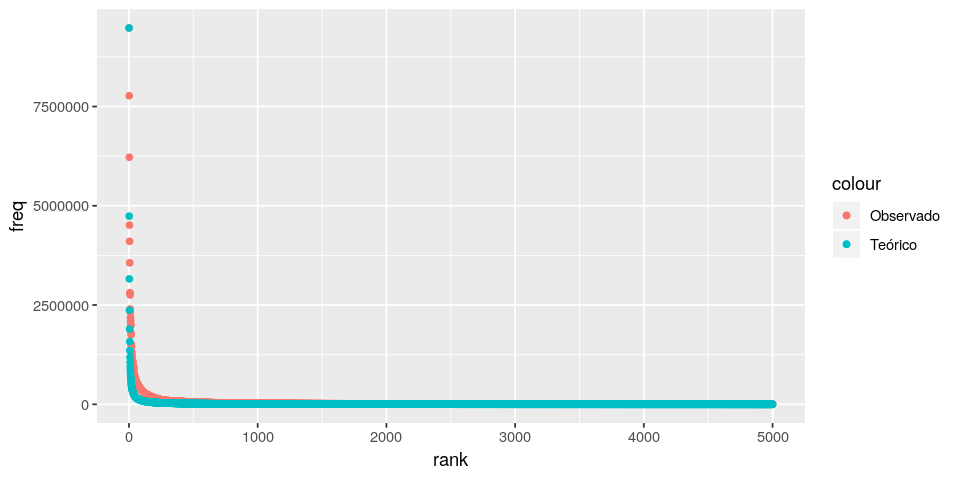

In [39]:
options(repr.plot.width=8, repr.plot.height=4)

zipfs_plot <- ggplot(word_freq, aes(x = rank, y = freq)) + 
                    geom_point(aes(color = "Observado")) + 
                    geom_point(aes(y = zipfs_freq, color = "Teórico"))
                   
zipfs_plot

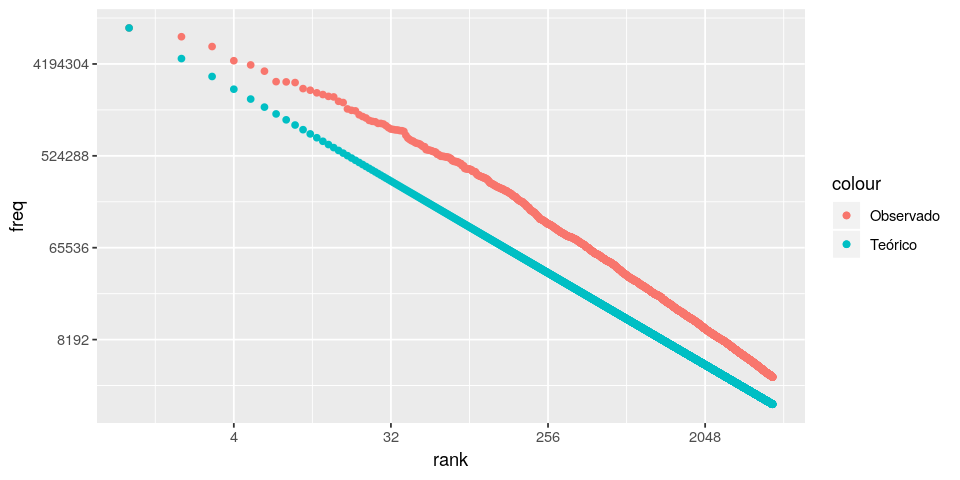

In [40]:
# Usando escala logarítmica 
# para melhor comparar as
# duas frequências
zipfs_plot + scale_x_continuous(trans='log2') +
             scale_y_continuous(trans='log2')

Essa experiência é incrível, porque a linguagem é muito complicada. 
As palavras no texto não são aleatórias em nenhum sentido, e dependem das anteriores. 
É por isso que é tão surpreendente ver esses padrões aqui. 
Devemos sempre lembrar que o mundo pode nos surpreender de muitas maneiras diferentes!